## **Time series analysis on vegetable prices**

In this analysis we will determine what factors contribute to the fluctuation in prices of vegetable prices for:

 <a href="">Bhindi</a>
, <a href="">Tomato</a>
, <a href="">Onion</a>
, <a href="">Potato</a>
, <a href="">Brinjal</a>
, <a href="">Garlic</a>
, <a href="">Peas</a>
, <a href="">Green Chilli</a>
, <a href="">Eephant Yams</a>


We will consider factors such as:
1) if seasons contribute to vegetable prices, (month of the year)?
2) What region of the world the plant comes from
3) If specific vegetables are bought more frequently than others?
4) What do the prices have in common with the vegetable type and what does it mean?

**1) Data Import**

In [ ]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
import datetime as dt

#attain dataset from file
vegetable_prices = pd.read_csv('./dataset/prices.csv')

data = vegetable_prices
#test dataset for established connection
data.head()


**Univariate analysis**

In [ ]:
#Lets dentify the type of data we are dealing with in the dataframe:
data.info()

**2 Data format:**

1) lets format the data so we it is easier to use

In [ ]:
#Method to convert datatypes in dataframe:
def convert_data_type(list_of_columns):
    for column in list_of_columns:
        data[column] = data[column].apply(float)

#List of columns we want to convert their datatypes:
list_of_columns = data.columns.to_list()[1:]

convert_data_type(list_of_columns)
data.info()

here we group our data to make it easier to analyze

In [71]:
#convert datatype of date column: 
data['Price Dates'] = pd.to_datetime(data['Price Dates'],format='mixed')

#split the data so we can have our quartery preformance (seasonal):
data['quarter'] = data['Price Dates'].dt.to_period('Q')


quarter_preformance=data.drop('Price Dates',axis=1)



Let us understand our data a bit more to know what we are dealing with

## *Bhindi*  <img src="./assets/Bhindi (Ladies finger).jpg" alt="Bhindi image" width="350" height="250">

What is Bhindi?

Bhindi, also known as okra or lady's fingers, is a flowering plant in the mallow family. It is valued for its edible green seed pods.

Where is it commonly found?

Bhindi is cultivated in tropical, subtropical, and warm temperate regions worldwide. It is a popular vegetable in many cuisines, including Indian, African, Middle Eastern, and Caribbean.

Major exporting country:

India is the top exporter of fresh okra globally.

Additional details:

Origin: Okra is believed to have originated in Africa.
Other names: Okra is also called lady's fingers, gumbo, and bhindi.
Nutritional value: Okra is a good source of vitamins, minerals, and fiber.
Culinary uses: Okra is used in various dishes, including stews, soups, curries, and stir-fries. It can be fried, boiled, steamed, or pickled.
I hope this information is helpful. Let me know if you have any other questions.

## *Tomatos*  <img src="./assets/Tomato.jpg" alt="Tomatos image" width="350" height="300">

What are Tomatoes?

Tomatoes are the edible berries of the plant Solanum lycopersicum, commonly known as a tomato plant. They are native to South America and are now grown worldwide.

Where are they commonly found?

Tomatoes are cultivated globally, thriving in warm, sunny climates. Major producing regions include China, India, the United States, Turkey, and Egypt.

Major exporting country:

Mexico is the world's leading exporter of tomatoes, primarily supplying the United States market.

Additional details:

Types: There are various tomato varieties, including beefsteak, cherry, grape, Roma, and heirloom tomatoes, each with unique characteristics.
Nutritional value: Tomatoes are rich in vitamins (especially vitamin C and K), minerals, and antioxidants like lycopene.
Culinary uses: Tomatoes are incredibly versatile, used in salads, sauces, soups, sandwiches, and many other dishes. They can be eaten raw, cooked, or processed into products like ketchup and juice.
I hope this information is helpful. Let me know if you have any other questions.

## *Onions*  <img src="./assets/Onion.jpg" alt="Onions image" width="350" height="300">

What are Onions?

Onions are a vegetable and are part of the allium family, which also includes garlic, shallots, chives, and leeks. Onions are grown worldwide and can be eaten raw or cooked. They have a pungent flavor and aroma that is due to sulfur compounds present in the onion.

Where are they commonly found?

Onions are cultivated globally, with major producing regions including China, India, the United States, and Egypt. They can be grown in a variety of climates but thrive in areas with moderate temperatures and well-drained soil.

Major exporting country:

The Netherlands is the world's leading exporter of onions, renowned for its large-scale onion production and efficient distribution networks.

Additional details:

Types: There are various onion types, including yellow, white, red, and sweet onions, each with unique flavors and culinary uses.
Nutritional value: Onions are a good source of vitamins (especially vitamin C), minerals, and antioxidants.
Culinary uses: Onions are a fundamental ingredient in countless cuisines, used as a base for flavor in soups, stews, stir-fries, and many other dishes. They can be caramelized, roasted, pickled, or eaten raw in salads.
I hope this information is helpful. Let me know if you have any other questions.


## *Potatos*  <img src="./assets/Potato.jpg" alt="Potatos image" width="350" height="300">

What are Potatoes?

Potatoes are starchy, tuberous crops from the perennial nightshade Solanum tuberosum. They are native to the Andes Mountains of South America and are now a staple food in many parts of the world.

Where are they commonly found?

Potatoes are cultivated globally, thriving in cool climates with well-drained soil. Major producing regions include China, India, Russia, Ukraine, and the United States.

Major exporting country:

The Netherlands and France are among the leading exporters of fresh potatoes and potato products worldwide.

Additional details:

Types: There are numerous potato varieties, including russet, Yukon Gold, red bliss, and fingerling potatoes, each with distinct characteristics and culinary uses.
Nutritional value: Potatoes are a good source of carbohydrates, dietary fiber, vitamin C, and potassium.
Culinary uses: Potatoes are incredibly versatile, used in countless dishes, including mashed potatoes, french fries, baked potatoes, potato salads, and soups. They can be boiled, fried, baked, roasted, or steamed.
I hope this information is helpful. Let me know if you have any other questions.


## *Brinjal*  <img src="./assets/Brinjal.jpg" alt="Brinjal image" width="350" height="300">

What is Brinjal?

Brinjal, also known as eggplant or aubergine, is a plant species in the nightshade family. It's cultivated for its edible fruit, which is technically a berry.

Where is it commonly found?

Brinjal is grown in tropical and subtropical regions worldwide. Leading producers include China, India, Egypt, Turkey, and Iran. It prefers warm weather and well-drained soil.

Major exporting country:

While India and China produce the most brinjal, the Netherlands and Spain are significant exporters to European markets. Mexico also plays a role in exporting to North America. The European market seeks more exotic and non-European varieties.

Additional details:

Varieties: Brinjal comes in various shapes, sizes, and colors, including the common large purple variety, as well as long, thin, green, white, and even striped ones.
Nutritional value: Brinjal is a good source of dietary fiber, vitamins, and minerals, particularly antioxidants like nasunin (found in the purple skin).
Culinary uses: Brinjal is versatile and used in numerous cuisines. It's often used in stir-fries, curries, dips (like baba ghanoush), and can be grilled, roasted, or fried.
I hope this information is helpful. Let me know if you have any other questions.


## *Garlic*  <img src="./assets/Garlic.jpg" alt="Garlic image" width="350" height="300">

What is Garlic?

Garlic is a species in the onion genus, Allium. It is a widely used culinary ingredient known for its pungent flavor and aroma. Garlic has been used for both culinary and medicinal purposes for centuries.

Where is it commonly found?

Garlic is cultivated globally, thriving in temperate climates. Major garlic-producing regions include China, India, Spain, the United States, and Egypt.

Major exporting country:

China is the world's leading exporter of garlic, followed by Spain and Argentina.

Additional details:

Varieties: There are various garlic types, including softneck, hardneck, and elephant garlic, each with unique characteristics and flavors.
Nutritional value: Garlic is a good source of vitamins (especially vitamin C and B6), minerals (like manganese and selenium), and antioxidants.
Culinary uses: Garlic is a fundamental ingredient in countless cuisines, used to flavor dishes such as stir-fries, sauces, soups, and roasted meats. It can be used fresh, minced, crushed, or roasted.
I hope this information is helpful. Let me know if you have any other questions.


## *Peas*  <img src="./assets/Peas.jpg" alt="Peas image" width="350" height="300">

What are Peas?

Peas are the small, spherical seeds of the pod fruit Pisum sativum. They are a popular vegetable, belonging to the legume family.

Where are they commonly found?

Peas are cultivated globally, thriving in cool, temperate climates. Major pea-producing regions include Canada, Russia, China, India, and the United States.

Major exporting country:

Canada is the world's leading exporter of peas, particularly dry peas, followed by the United States and Russia. Guatemala is a major exporter of fresh peas.

Additional details:

Types: There are various types of peas, including garden peas (shelled or eaten as whole pods), snow peas (eaten with their flat pods), and snap peas (eaten with their edible pods).
Nutritional value: Peas are a good source of protein, dietary fiber, vitamins (especially vitamin K and A), and minerals (like iron and manganese).
Culinary uses: Peas are versatile and used in numerous cuisines. They can be added to soups, stews, stir-fries, salads, or eaten as a side dish. They can also be processed into products like frozen peas and pea protein.
I hope this information is helpful. Let me know if you have any other questions.


## *Methi*  <img src="./assets/Methi.jpg" alt="Methi image" width="350" height="300">

What is Methi?

Methi, commonly known as fenugreek, is an annual plant in the family Fabaceae. It is cultivated worldwide as a semi-arid crop. Its leaves and seeds are common ingredients in dishes from the Indian subcontinent and have been used as a culinary ingredient since ancient times.

Where is it commonly found?

Methi is cultivated in many parts of the world, including India, the Middle East, North Africa, and parts of Europe. It thrives in dry and semi-arid climates.

Major exporting country:

India is the largest producer and exporter of fenugreek seeds globally. Rajasthan, in particular, is a major fenugreek-producing state in India.

Additional details:

Uses: Methi is used both as a herb (leaves) and a spice (seeds). It has a slightly bitter taste and a distinctive aroma.
Culinary uses: The leaves are often used in Indian curries, stir-fries, and flatbreads. The seeds are used as a spice in various cuisines, often roasted or ground.
Nutritional Value: Fenugreek is a good source of fiber, protein, and various minerals. It is also believed to have several health benefits, although more research is needed in this area.
I hope this information is helpful. Let me know if you have any other questions.


## *Green Chilli*  <img src="./assets/Green Chilli.jpg" alt="Green Chilli image" width="350" height="300">

What is Green Chilli?

Green chillies are the unripe fruits of the Capsicum species, belonging to the nightshade family. They are a common ingredient in many cuisines, prized for their spicy heat and vibrant flavor.

Where are they commonly found?

Green chillies are cultivated in tropical and subtropical regions worldwide. Leading producers include India, China, Mexico, Turkey, and Indonesia.

Major exporting country:

India is the world's leading exporter of green chillies, with significant markets in the Middle East, Southeast Asia, and Europe. Mexico is also a major exporter, primarily to the United States.

Additional details:

Varieties: Green chillies come in numerous varieties, varying in size, shape, heat level, and flavor profiles. Some popular types include Serrano, Jalapeño, Thai, and Bird's Eye chillies.
Nutritional value: Green chillies are a good source of vitamin C, antioxidants, and capsaicin (the compound responsible for their heat).
Culinary uses: Green chillies are widely used in various cuisines, adding spice and flavor to dishes such as curries, stir-fries, salsas, and sauces. They can be used fresh, pickled, or dried.
I hope this information is helpful. Let me know if you have any other questions.



## *Elephant Yam (Suran)*  <img src="./assets/Elephant Yam (Suran).jpg" alt="Elephant Yam image" width="350" height="300">

What is Elephant Yam (Suran)?

Elephant Yam, also known as Suran or Jimikand, is a tropical tuber crop belonging to the Araceae family. It is cultivated for its large, starchy corm, which is a popular ingredient in many cuisines.

Where is it commonly found?

Elephant Yam is primarily grown in tropical and subtropical regions of Asia, Africa, and the Pacific Islands. Major producing countries include India, China, Indonesia, Nigeria, and the Philippines.

Major exporting country:

While precise export data is limited, India is likely a significant exporter of Elephant Yam, given its large-scale cultivation. However, exports may be primarily focused on processed or value-added products derived from the yam.

Additional details:

Characteristics: Elephant Yam has a large, brown, rough-textured corm with white or cream-colored flesh. It has a distinct, somewhat pungent flavor that mellows upon cooking.
Nutritional value: Elephant Yam is a good source of carbohydrates, dietary fiber, vitamins (especially vitamin B6), and minerals (like potassium and magnesium).
Culinary uses: Elephant Yam is used in various cuisines, commonly boiled, fried, or roasted. It is often added to curries, stews, soups, and stir-fries. In some cultures, it is also used to make desserts and snacks.

**3 Determine measures of central tendency:**

we declare the mean, median, minimum and maximum values in the data:

In [74]:

quarter_average_price= quarter_preformance.groupby('quarter').mean().round(2)
quarter_common_price= quarter_preformance.groupby('quarter').median().round(2)
quarter_lowest_price= quarter_preformance.groupby('quarter').min().round(2)
quarter_highest_price= quarter_preformance.groupby('quarter').max().round(2)

In [75]:
quarter_average_price

,index,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,,
2023Q1,67.60,32.88,16.03,15.05,16.44,30.09,89.41,47.18,10.22,42.71,27.50
2023Q2,120.03,26.20,16.00,14.85,18.89,29.22,107.57,66.32,14.04,44.92,26.65
2023Q3,165.33,25.58,16.00,21.10,19.14,29.49,146.88,81.35,13.04,47.43,31.26
2023Q4,210.97,32.99,16.00,31.16,19.73,37.32,182.97,70.96,43.11,41.22,29.73
2024Q1,286.00,45.00,16.00,9.00,18.00,50.00,260.00,40.00,15.00,60.00,25.00


In [76]:
quarter_common_price

,index,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,,
2023Q1,50.5,33.00,16.0,12.0,15.0,25.0,80.0,30.0,8.0,40.0,30.0
2023Q2,112.5,27.00,16.0,12.5,20.0,25.0,95.0,60.0,15.0,40.0,25.0
2023Q3,177.5,24.25,16.0,22.0,20.0,30.0,160.0,75.0,12.0,40.0,30.0
2023Q4,237.5,32.00,16.0,30.0,20.0,32.5,170.0,60.0,15.0,40.0,30.0
2024Q1,286.0,45.00,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


In [77]:
quarter_lowest_price

,index,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,,
2023Q1,0,17.0,16.0,8.0,12.0,16.0,50.0,22.0,5.0,30.00,12.0
2023Q2,3,17.5,16.0,8.0,14.0,14.0,55.0,25.0,6.0,0.13,12.0
2023Q3,4,17.0,16.0,9.0,14.0,15.0,55.0,22.0,5.0,30.00,12.0
2023Q4,5,20.0,16.0,9.0,14.0,15.0,55.0,23.0,5.0,25.00,15.0
2024Q1,286,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.00,25.0


In [78]:
quarter_highest_price

,index,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,,
2023Q1,241,45.0,18.0,54.0,22.0,70.0,170.0,150.0,25.0,80.0,50.0
2023Q2,265,40.0,16.0,50.0,22.0,50.0,290.0,130.0,25.0,90.0,40.0
2023Q3,267,42.5,16.0,48.0,21.0,50.0,270.0,150.0,30.0,90.0,50.0
2023Q4,285,60.0,16.0,57.0,24.0,80.0,270.0,150.0,2000.0,80.0,40.0
2024Q1,286,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0


**4 Visual illustration (bar graph) to visualize the data:**

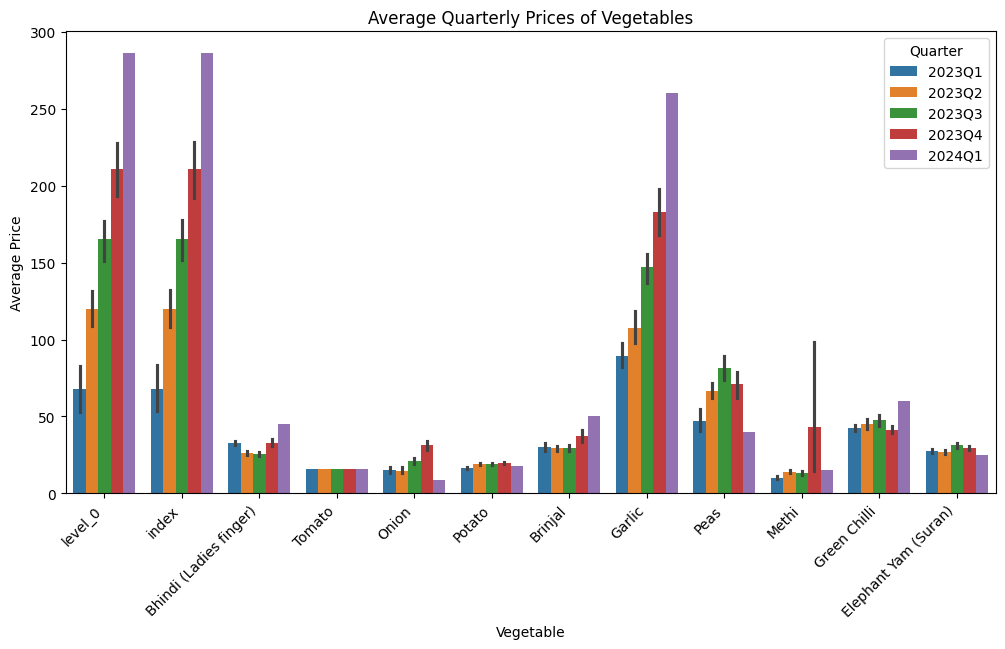

In [79]:
# Reset index to make 'quarter' a column
quarter_preformance = quarter_preformance.reset_index()

# Melt the dataframe to have vegetables and quarters in separate columns
df_melted = pd.melt(quarter_preformance, id_vars=['quarter'], var_name='Vegetable', value_name='Average Price')

#Remove level_0 and index by resetting index after melt
df_melted = df_melted.reset_index(drop=True)

# Create the grouped bar graph using Seaborn
plt.figure(figsize=(12, 6))
sn.barplot(x='Vegetable', y='Average Price', hue='quarter', data=df_melted)
plt.xlabel("Vegetable")
plt.ylabel("Average Price")
plt.title("Average Quarterly Prices of Vegetables")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.legend(title='Quarter')
plt.show()